## Libraries

In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

## Loading dataset

In [157]:
glass = pd.read_csv("glass.csv",names=["ID","RI","Na","MG","Al","Si","K","Ca","Ba","Fe","type"])
target = glass["type"]
glass = glass.drop(["ID"], axis=1)
glass = glass.drop(["type"], axis=1)
glass.head()

,RI,Na,MG,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


## Missing values

In [158]:
print(glass.isnull().sum().sum())
print(target.isnull().sum())

0
0


## Train test split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(glass,target,test_size = 0.3)

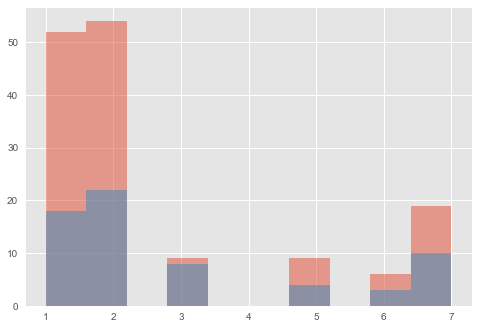

In [160]:
plt.style.use("ggplot")
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

## Data Visualization

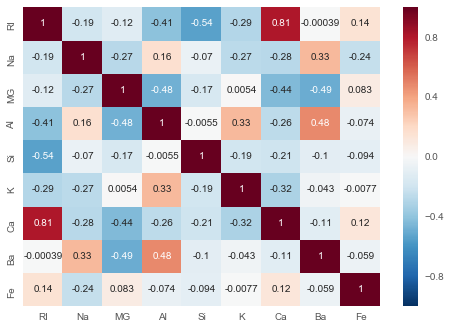

In [161]:
sns.heatmap(glass.corr(), annot=True)
plt.show()

## Hight corelation variables scatter plot 

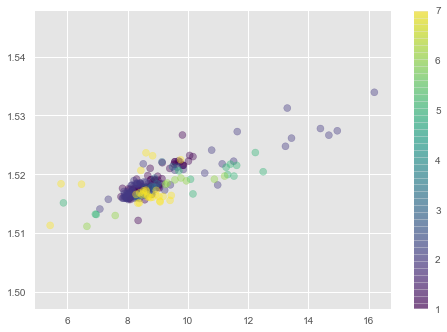

In [162]:
plt.style.use("ggplot")
plt.scatter(x=glass["Ca"],y=glass["RI"],marker='o',c=target,cmap='viridis', alpha = 0.4)
plt.colorbar()
plt.show()

## Popular model with default hyper-parameters on all variables and all observation

In [202]:
rf = RandomForestClassifier()
score_rf = cross_val_score(estimator=rf,cv=7,X=glass,y=target)

In [203]:
svm = SVC()
score_svm = cross_val_score(estimator=svm,cv=7,X=glass,y=target)

In [204]:
tree = DecisionTreeClassifier()
score_tree = cross_val_score(estimator=tree,cv=7,X=glass,y=target)

In [205]:
neighboor = KNeighborsClassifier()
score_neighboor = cross_val_score(estimator=neighboor,cv=7,X=glass,y=target)

In [206]:
log_reg = LogisticRegression()
score_log_reg = cross_val_score(estimator=log_reg,cv=7,X=glass,y=target)

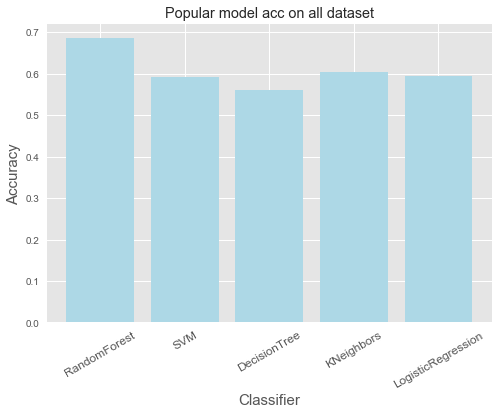

Maksimum accuracy is: 0.686561384084 from KNeighbors classifier.


In [207]:
scores = [np.mean(score_rf),np.mean(score_svm),np.mean(score_tree)
                  ,np.mean(score_neighboor),np.mean(score_log_reg)]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular model acc on all dataset")
plt.show()

print("Maksimum accuracy is: " + str(max(scores)) + " from " + str(label[3]) + " classifier.")

## PCA + feature extraction

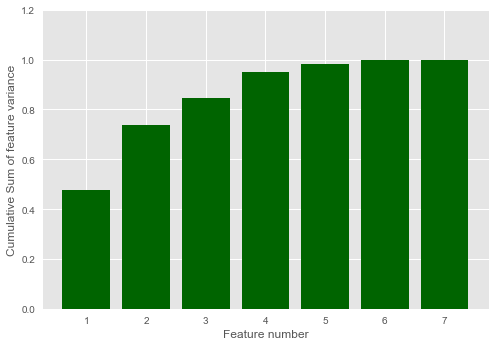

[ 0.47620525  0.73939801  0.84719844  0.94922308  0.98229031  0.99833805
  0.99976548]
We will use first 4 features


In [208]:
PCA_transf = PCA(n_components=7)
glass_PCA = PCA_transf.fit_transform(glass)

sum_of_variance = np.cumsum(PCA_transf.explained_variance_ratio_)
index = np.arange(1,len(sum_of_variance)+1)

plt.bar(index,sum_of_variance,color = "darkgreen")
plt.ylim(bottom = 0, top = 1.2)
plt.xlabel("Feature number")
plt.ylabel("Cumulative Sum of feature variance")
plt.show()
print(sum_of_variance)
print("We will use first 4 features")

In [209]:
glass_PCA = pd.DataFrame(glass_PCA)
glass_PCA = glass_PCA.drop([4],axis=1)
glass_PCA = glass_PCA.drop([5],axis=1)
glass_PCA = glass_PCA.drop([6],axis=1)
glass_PCA.head()

,0,1,2,3
0,-1.431425,-1.102115,-1.066958,-0.158237
1,-1.436707,0.343585,-0.277824,-0.293937
2,-1.427322,0.345720,0.138708,-0.321984
3,-1.257825,-0.249060,0.057742,0.022271
4,-1.312466,-0.018405,0.357510,-0.278564


In [210]:
rf_PCA = RandomForestClassifier()
score_rf_PCA = cross_val_score(estimator=rf,cv=7,X=glass_PCA,y=target)

In [211]:
svm_PCA = SVC()
score_svm_PCA = cross_val_score(estimator=svm,cv=7,X=glass_PCA,y=target)

In [212]:
tree_PCA = DecisionTreeClassifier()
score_tree_PCA = cross_val_score(estimator=tree,cv=7,X=glass_PCA,y=target)

In [213]:
neighboor_PCA = KNeighborsClassifier()
score_neighboor_PCA = cross_val_score(estimator=neighboor,cv=7,X=glass_PCA,y=target)

In [214]:
log_reg_PCA = LogisticRegression()
score_log_reg_PCA = cross_val_score(estimator=log_reg,cv=7,X=glass_PCA,y=target)

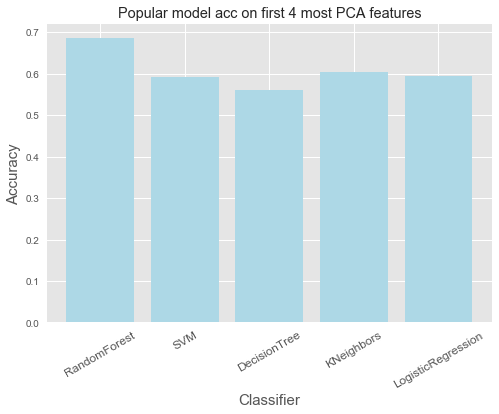

Maksimum accuracy is: 0.663035888842 from RandomForest classifier.


In [215]:
scores_PCA = [np.mean(score_rf_PCA),np.mean(score_svm_PCA),np.mean(score_tree_PCA)
                  ,np.mean(score_neighboor_PCA),np.mean(score_log_reg_PCA)]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular model acc on first 4 most PCA features")
plt.show()

print("Maksimum accuracy is: " + str(max(scores_PCA)) + " from " + str(label[0]) + " classifier.")